### **What is `scipy.integrate`?**

In simple words, integration is like calculating the area under a curve, right? Matlab: If you have a function, and you want to find out the total area from one point to another on its curve, you integrate that function.

Now, in **SciPy**, we have a module called **`integrate`**, which is *very* useful for solving both simple and complex integration problems. Whether it's single-variable integrals, multi-variable integrals, or solving differential equations—this is the toolkit you need!

### **Basic Integration using `quad()`**

Let’s start with a simple problem. Suppose you have a function `f(x) = x^2`, and you want to integrate this function between limits, say from 0 to 2. Now, we can use **`quad()`**, which is like a shortcut for **Quadrature**, an integration technique.

In [1]:
import scipy.integrate as integrate

# Define the function
def f(x):
    return x**2

# Perform the integration
result, error = integrate.quad(f, 0, 2)

print("Result of the integration:", result)
print("Estimated error:", error)

Result of the integration: 2.666666666666667
Estimated error: 2.960594732333751e-14


- `quad()` returns two values: the integral result and the error estimate.
- It integrates `f(x)` from `0` to `2`.

**Explanation**: Just like in your school where you learned to find the area of rectangles and sum them up to approximate the area under a curve, here SciPy does it smartly for us. The result will be the exact area!

### **Double Integration using `dblquad()`**

Now suppose you need to calculate a double integral. Don’t worry! You don’t have to do everything by hand—SciPy has your back with **`dblquad()`**. It’s for *two-variable* functions.

Let’s say you want to integrate `f(x, y) = x * y` over the ranges `x: [0, 1]` and `y: [0, 1]`.

In [2]:
def f(x, y):
    return x * y

result, error = integrate.dblquad(f, 0, 1, lambda x: 0, lambda x: 1)

print("Result of the double integration:", result)
print("Estimated error:", error)

Result of the double integration: 0.24999999999999997
Estimated error: 5.539061329123429e-15


- The function `f(x, y)` is integrated over the region where `x` ranges from `0` to `1`, and for each value of `x`, `y` ranges from `0` to `1`.
- We use **lambda functions** here to specify the limits for `y` which depend on `x`.

### **Triple Integration using `tplquad()`**

We can go even further, like into three dimensions, using **`tplquad()`**. For instance, if you have a function of three variables, `f(x, y, z)`, and you want to compute the volume under it, here’s how you do it.

**Example**: For `f(x, y, z) = x * y * z` with `x: [0, 1]`, `y: [0, 1]`, and `z: [0, 1]`.

In [3]:
def f(x, y, z):
    return x * y * z

result, error = integrate.tplquad(f, 0, 1, lambda x: 0, lambda x: 1, lambda x, y: 0, lambda x, y: 1)

print("Result of the triple integration:", result)
print("Estimated error:", error)

Result of the triple integration: 0.12499999999999999
Estimated error: 5.527033708952211e-15


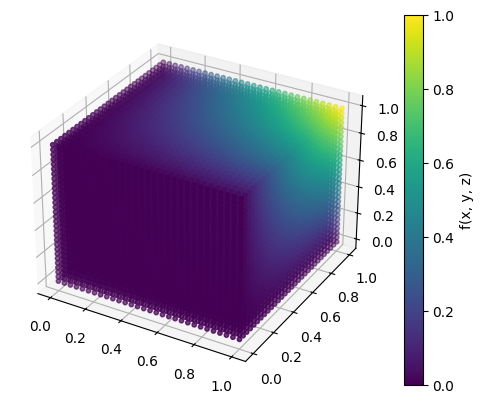

In [4]:
import numpy as np
import matplotlib.pyplot as plt

X, Y, Z = np.meshgrid(np.linspace(0, 1, 30), np.linspace(0, 1, 30), np.linspace(0, 1, 30))
F_values = X * Y * Z

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scat = ax.scatter(X, Y, Z, c=F_values, cmap='viridis', s=10)
fig.colorbar(scat, label='f(x, y, z)')
plt.show()

calculating the volume under a 3D surface!

### **Solving Ordinary Differential Equations (ODEs) with `solve_ivp()`**

One of the most *powerful* uses of `scipy.integrate` is for solving differential equations. If you have a system where the change in one variable depends on the change in another (that’s basically a differential equation), you can use **`solve_ivp()`**.

Imagine you have an equation like:

\[
\frac{dy}{dx} = -2y
\]

We want to solve this differential equation starting at `x = 0` and ending at `x = 5`, with an initial condition that `y(0) = 1`.

In [6]:
import numpy as np

# Define the differential equation as a function
def dydx(x, y):
    return -2 * y

# Define the time points where we want the solution
x_vals = np.linspace(0, 5, 100)

# Solve the equation using solve_ivp
solution = integrate.solve_ivp(dydx, [0, 5], [1], t_eval=x_vals)
x = solution.t
y = solution.y[0]
print("Solution values for y:", y)

Solution values for y: [1.00000000e+00 9.03923887e-01 8.17053791e-01 7.38413129e-01
 6.67297051e-01 6.03060501e-01 5.45085645e-01 4.92781868e-01
 4.45585776e-01 4.02961195e-01 3.64399172e-01 3.29425220e-01
 2.97736577e-01 2.69079320e-01 2.43189588e-01 2.19816052e-01
 1.98719907e-01 1.79674881e-01 1.62467225e-01 1.46895723e-01
 1.32780882e-01 1.20003932e-01 1.08453316e-01 9.80209711e-02
 8.86040063e-02 8.01047008e-02 7.24305047e-02 6.54940384e-02
 5.92130933e-02 5.35199888e-02 4.83690166e-02 4.37138378e-02
 3.95102248e-02 3.57160940e-02 3.22915055e-02 2.91986632e-02
 2.64019148e-02 2.38679096e-02 2.15721470e-02 1.94957265e-02
 1.76196766e-02 1.59259115e-02 1.43972308e-02 1.30173199e-02
 1.17707493e-02 1.06429754e-02 9.62071431e-03 8.69503304e-03
 7.85804465e-03 7.10200323e-03 6.41952570e-03 5.80359186e-03
 5.24754432e-03 4.74508859e-03 4.29029297e-03 3.87796247e-03
 3.50473220e-03 3.16734084e-03 2.86263967e-03 2.58762584e-03
 2.33944232e-03 2.11537794e-03 1.91286737e-03 1.72949112e-03
 

- `solve_ivp()` is the *integrator* that handles the differential equation.
- We define `dydx()` to represent the equation.
- `x_vals` is the array of points where we want the solution.
- Initial condition: `y(0) = 1`.
- `solution.y[0]` gives us the actual solution values for `y`.

### **Multiple Integration using `nquad()`**

Finally, if you have really **complex, multi-variable integrals**, then **`nquad()`** is your friend. It allows you to compute n-dimensional integrals.

Let’s take an example where we integrate `f(x, y, z) = x * y * z` with certain ranges for each variable. This can be done like this:

In [7]:
def integrand(x, y, z):
    return x * y * z

limits = [[0, 1], [0, 1], [0, 1]]

result, error = integrate.nquad(integrand, limits)

print("Result of multiple integration:", result)
print("Estimated error:", error)

Result of multiple integration: 0.12499999999999999
Estimated error: 5.527033708952211e-15


nquad() can handle more than three dimensions! You provide it the function and the limits for each variable.